In [1]:
# dataset from https://www.kaggle.com/datasets/saurabhshahane/fake-news-classification

In [2]:
import pandas as pd
import re
import string
import nltk
from tqdm import tqdm
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [3]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [4]:
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [5]:
dfi=pd.read_csv("WELFake_Dataset.csv")
# df = pd.read_csv("fake_and_real_news.csv")

dfi['text'] = (dfi['title'].fillna('') + ' ' + dfi['text'].fillna('')).str.strip()

In [7]:
df1 = dfi[['text', 'label']]
# df = df[['text', 'label']]

# df['label'] = df['label'].replace({'Fake': 0, 'Real': 1}).astype(int)
# df1 = pd.concat([dfi, df], ignore_index=True)

print(df1.head())

                                                text  label
0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...      1
1     Did they post their votes for Hillary already?      1
2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...      1
3  Bobby Jindal, raised Hindu, uses story of Chri...      0
4  SATAN 2: Russia unvelis an image of its terrif...      1


In [8]:
df1.tail()
print(df1['label'].value_counts())

label
1    37106
0    35028
Name: count, dtype: int64


In [9]:
print(df1.shape)
df1.head()
print(df1)

(72134, 2)
                                                    text  label
0      LAW ENFORCEMENT ON HIGH ALERT Following Threat...      1
1         Did they post their votes for Hillary already?      1
2      UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...      1
3      Bobby Jindal, raised Hindu, uses story of Chri...      0
4      SATAN 2: Russia unvelis an image of its terrif...      1
...                                                  ...    ...
72129  Russians steal research on Trump in hack of U....      0
72130  WATCH: Giuliani Demands That Democrats Apologi...      1
72131  Migrants Refuse To Leave Train At Refugee Camp...      0
72132  Trump tussle gives unpopular Mexican leader mu...      0
72133  Goldman Sachs Endorses Hillary Clinton For Pre...      1

[72134 rows x 2 columns]


In [10]:
df1 = df1.dropna()

In [11]:
print(df1.shape)
df1.head()

(72134, 2)


,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,1
1,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",0
4,SATAN 2: Russia unvelis an image of its terrif...,1


In [12]:
df1['label'].value_counts()

label
1    37106
0    35028
Name: count, dtype: int64

In [13]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [14]:
def get_wordnet_pos(word, pos_tag):
    """Map POS tag to WordNet POS tag for lemmatization."""
    tag = pos_tag[0].upper()
    tag_dict = {
        'J': wordnet.ADJ,
        'N': wordnet.NOUN,
        'V': wordnet.VERB,
        'R': wordnet.ADV
    }
    return tag_dict.get(tag, wordnet.NOUN)

def clean_text(text):
    # Lowercase
    text = text.lower()
    
    # Remove emails, hashtags, mentions, links, and code-style comments
    text = re.sub(r'\b[\w\.-]+@[\w\.-]+\.\w+\b', ' ', text)
    text = re.sub(r'#\w+', ' ', text)
    text = re.sub(r'@\w+', ' ', text)
    text = re.sub(r'http\S+|www\S+|https\S+', ' ', text)
    text = re.sub(r'//.*?$|/\*.*?\*/|#.*?$', ' ', text, flags=re.MULTILINE)
    
    # Remove special quotes
    text = re.sub(r"[\"'“”‘’]", '', text)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove digits (optional: keep if relevant)
    text = re.sub(r'\d+', '', text)
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stopwords
    tokens = [t for t in tokens if t not in stop_words and len(t) > 1]
    
    # POS tagging
    pos_tags = nltk.pos_tag(tokens)
    
    # Lemmatization with POS
    lemmatized_tokens = [
        lemmatizer.lemmatize(token, get_wordnet_pos(token, pos))
        for token, pos in pos_tags
    ]
    
    return ' '.join(lemmatized_tokens)

# Apply cleaning with progress bar
tqdm.pandas()
df1['text'] = df1['text'].progress_apply(clean_text)


100%|████████████████████████████████████████████████████████████████████████████| 72134/72134 [41:25<00:00, 29.02it/s]


In [15]:
df1.head()

,text,label
0,law enforcement high alert follow threat cop w...,1
1,post vote hillary already,1
2,unbelievable obamas attorney general say charl...,1
3,bobby jindal raise hindu us story christian co...,0
4,satan russia unvelis image terrify new supernu...,1


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=20000, ngram_range=(1, 2))

x = vectorizer.fit_transform(df1['text'])

print("TI-IDF Vector shape: ", x.shape)

TI-IDF Vector shape:  (72134, 20000)


In [17]:
print(x)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 15295206 stored elements and shape (72134, 20000)>
  Coords	Values
  (0, 9143)	0.017741678957314932
  (0, 5217)	0.027050170184901978
  (0, 7482)	0.019537956769556265
  (0, 431)	0.035542119583633645
  (0, 6162)	0.017531253766157294
  (0, 17474)	0.046104037398255304
  (0, 3482)	0.16936687257591237
  (0, 19306)	0.1663653473841375
  (0, 17291)	0.050390468120163436
  (0, 18801)	0.03519953554226987
  (0, 3094)	0.019133796384886857
  (0, 5588)	0.02044709290178169
  (0, 1386)	0.022339485714999923
  (0, 11475)	0.017496128995545496
  (0, 10228)	0.017651032377756528
  (0, 10744)	0.07682008533600947
  (0, 2168)	0.1099929445408753
  (0, 9693)	0.11107240972533158
  (0, 7240)	0.06763927998481721
  (0, 12296)	0.10814470730684453
  (0, 5175)	0.02854867692362445
  (0, 11890)	0.021048308038057052
  (0, 13542)	0.17046186545775968
  (0, 15739)	0.10753989503589889
  (0, 18228)	0.01986895702578853
  :	:
  (72133, 14221)	0.04654344297106462
  (7213

In [18]:
from sklearn.model_selection import train_test_split

y = df1["label"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=43)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3)
model.fit(x_train, y_train)

,loss,'log_loss'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [20]:
from sklearn.metrics import accuracy_score, classification_report

Y = model.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, Y))
print("\nClassification Report:\n ", classification_report(y_test, Y))

Accuracy:  0.932626325639426

Classification Report:
                precision    recall  f1-score   support

           0       0.95      0.91      0.93      7064
           1       0.92      0.95      0.94      7363

    accuracy                           0.93     14427
   macro avg       0.93      0.93      0.93     14427
weighted avg       0.93      0.93      0.93     14427



In [21]:
!pip install seaborn


[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


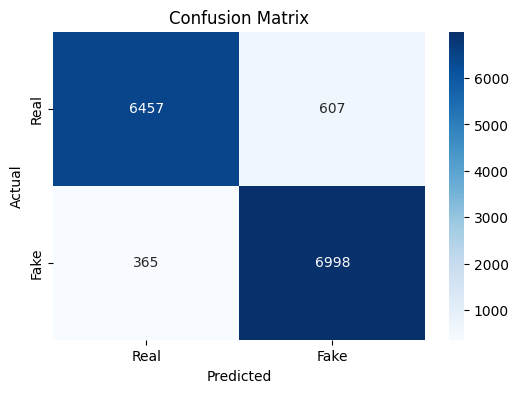

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming y_test and y_pred are defined
cm = confusion_matrix(y_test, Y)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Real', 'Fake'],
            yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


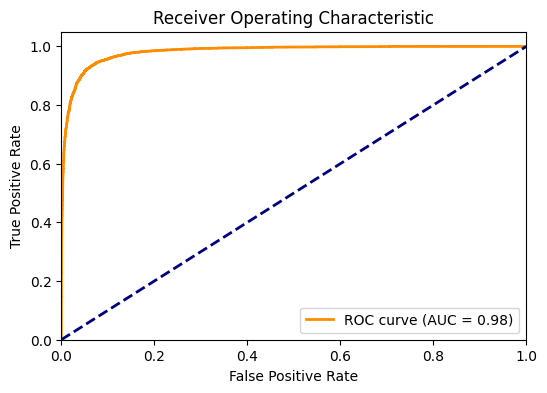

In [23]:
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import joblib

joblib.dump(model, "fake_news_pred_model.pkl")
joblib.dump(vectorizer, "fake_news_vectorizer_model.pkl")